In [1]:
import neat
import pickle
#load  best.pickl
# import neat
import pickle
import networkx as nx

In [6]:
checkpoint_file = 'recursive_no_drop/checkpoint-rec_no_drop_1-F3-G500-Nrecursive-OSTrue-D0.99-PR_False-CT_3-Movement_holonomic-Time_200.0-Reward_Sparse'

In [7]:
directory = "baseline2/" + checkpoint_file + "/best_genomes_by_generation"

In [8]:
#iterate through every pickle file in the directory, and calculate the fitness of each genome
import os
for filename in os.listdir(directory):
    if filename.endswith(".pickle"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "rb") as f:
            genome = pickle.load(f)
            print(f"Genome from {filename}:")
            print(genome.fitness)
            print("\n")


Genome from best_genome_gen_295.pickle:
18780553.00790815


Genome from best_genome_gen_488.pickle:
38082731.43112927


Genome from best_genome_gen_363.pickle:
45083369.460437804


Genome from best_genome_gen_42.pickle:
32638842.31814661


Genome from best_genome_gen_265.pickle:
68073414.96536437


Genome from best_genome_gen_209.pickle:
20138202.666553717


Genome from best_genome_gen_269.pickle:
68073414.96536437


Genome from best_genome_gen_350.pickle:
38376901.112770274


Genome from best_genome_gen_219.pickle:
36398805.10421575


Genome from best_genome_gen_177.pickle:
38290463.92392149


Genome from best_genome_gen_238.pickle:
40591645.28787001


Genome from best_genome_gen_11.pickle:
1909.9950936445794


Genome from best_genome_gen_62.pickle:
32638842.31814661


Genome from best_genome_gen_70.pickle:
682773.9465705834


Genome from best_genome_gen_92.pickle:
20794618.28337373


Genome from best_genome_gen_334.pickle:
38376901.112770274


Genome from best_genome_gen_53.pickle:
3

In [9]:
#get the highest fitness genome from the directory
best_genome = None
best_filename = None
best_fitness = float("-inf")
for filename in os.listdir(directory):
    if filename.endswith(".pickle"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "rb") as f:
            genome = pickle.load(f)
            if genome.fitness > best_fitness:
                best_fitness = genome.fitness
                best_genome = genome
                best_filename = filename
print("Best genome overall:")
print(best_genome.fitness)
print("Best genome filename:")
print(best_filename)

Best genome overall:
68073414.96536437
Best genome filename:
best_genome_gen_265.pickle


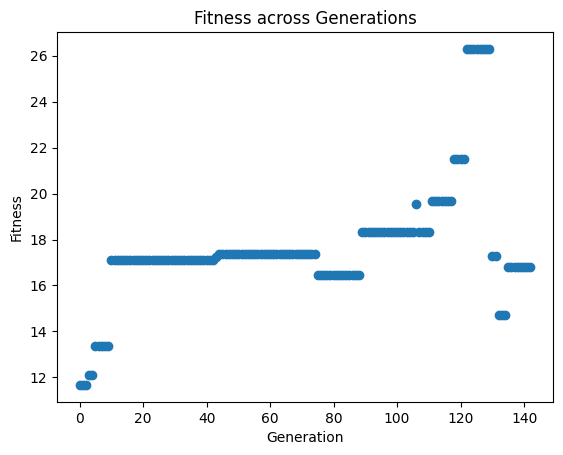

In [8]:
#plot the fitness across generations
import matplotlib.pyplot as plt
generations = []
fitnesses = []
for filename in os.listdir(directory):
    if filename.endswith(".pickle"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "rb") as f:
            genome = pickle.load(f)
            generation_number = int(filename.split("_")[-1].split(".")[0])
            generations.append(generation_number)
            fitnesses.append(genome.fitness)   

#dotplot
plt.scatter(generations, fitnesses)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness across Generations")
plt.show()

In [26]:
generations

[42,
 11,
 62,
 70,
 92,
 53,
 55,
 9,
 37,
 66,
 49,
 61,
 45,
 54,
 56,
 35,
 4,
 98,
 134,
 129,
 127,
 41,
 109,
 18,
 95,
 130,
 84,
 115,
 51,
 94,
 113,
 80,
 48,
 122,
 138,
 6,
 123,
 3,
 13,
 141,
 108,
 29,
 102,
 103,
 112,
 91,
 126,
 15,
 72,
 2,
 22,
 50,
 137,
 40,
 14,
 20,
 23,
 74,
 28,
 111,
 125,
 78,
 101,
 59,
 140,
 38,
 81,
 67,
 17,
 132,
 57,
 39,
 110,
 104,
 90,
 79,
 8,
 139,
 76,
 19,
 73,
 82,
 75,
 34,
 117,
 63,
 52,
 106,
 44,
 46,
 47,
 69,
 116,
 12,
 119,
 99,
 118,
 64,
 43,
 107,
 71,
 33,
 135,
 26,
 77,
 85,
 1,
 58,
 0,
 30,
 89,
 97,
 21,
 10,
 27,
 120,
 105,
 86,
 128,
 96,
 88,
 36,
 124,
 100,
 93,
 32,
 31,
 121,
 60,
 65,
 131,
 68,
 24,
 7,
 87,
 5,
 25,
 16,
 136,
 133,
 114,
 83]

In [18]:
#load the genome in best_networks called succesfful_gen.pickle
with open('best_networks/successful_gen.pickle', 'rb') as f:
    successful_genome = pickle.load(f)
    print("Successful genome fitness:")
    print(successful_genome.fitness)

Successful genome fitness:
72731.89017311795


Current directory:
/home/aayush-ubuntu/Neat-Foraging


In [7]:
#get the absolute path of the best genome file
best_genome_path = os.path.join(directory, best_filename)
print("Best genome absolute path:")
print(best_genome_path)

Best genome absolute path:
checkpoints/checkpoint-OFalse-F3-holonomic-G900-Nrecursive-Srecursive_test_1-RFalse-OTline-SEFalse-OSTrue-D0.9-PFalse-CT10-TC450.0-TBonus2.0-TFalse-NS8-FCTrue-Fmax-St30/best_genomes_by_generation/best_genome_gen_865.pickle


In [8]:
#get top 10 genomes by fitness from the directory
genomes = []
for filename in os.listdir(directory):
    if filename.endswith(".pickle"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "rb") as f:
            genome = pickle.load(f)
            genomes.append((genome.fitness, genome, filename))
#sort genomes by fitness
genomes.sort(key=lambda x: x[0], reverse=True)
print("Top 10 genomes by fitness:")
for i in range(min(10, len(genomes))):
    fitness, genome, filename = genomes[i]
    print(f"Rank {i+1}:")
    print(f"Filename: {filename}")
    print(f"Fitness: {fitness}")
    print("\n")

Top 10 genomes by fitness:
Rank 1:
Filename: best_genome_gen_318.pickle
Fitness: 857936.2140081037


Rank 2:
Filename: best_genome_gen_358.pickle
Fitness: 815019.1376380019


Rank 3:
Filename: best_genome_gen_330.pickle
Fitness: 799221.1553013237


Rank 4:
Filename: best_genome_gen_353.pickle
Fitness: 782831.4594274445


Rank 5:
Filename: best_genome_gen_360.pickle
Fitness: 779120.3435847971


Rank 6:
Filename: best_genome_gen_361.pickle
Fitness: 770348.0726689973


Rank 7:
Filename: best_genome_gen_317.pickle
Fitness: 758964.9635937429


Rank 8:
Filename: best_genome_gen_347.pickle
Fitness: 756264.8450415888


Rank 9:
Filename: best_genome_gen_362.pickle
Fitness: 756159.2612533107


Rank 10:
Filename: best_genome_gen_346.pickle
Fitness: 754533.1648397542


